# Grid lines

Grids that have been post-processed through CLOUDY also contain information on nebular emission lines. These can be loaded like regular grids, but there are a number of additional methods for working with lines as demonstrated in these examples:

In [18]:
import numpy as np
import matplotlib.pyplot as plt

from synthesizer.grid import Grid, get_available_lines

Let's begin by initialising a grid, making sure we add the flag for reading in the lines (by default we don't):

In [19]:
grid_dir = '../../../tests/test_grid'
grid_name = 'test_grid'
grid = Grid(grid_name, grid_dir=grid_dir, read_lines=True)

We can easily get a list of the available lines:

In [20]:
print(grid.line_list)

['AL 2 2660.35A', 'AR 3 7135.79A', 'AR 3 7751.11A', 'C 2 1037.02A', 'C 2 2325.40A', 'C 2 2326.93A', 'C 3 1906.68A', 'C 3 1908.73A', 'CA 2 7291.47A', 'CL 3 5517.71A', 'FE 2 2382.04A', 'FE 2 2625.67A', 'FE 3 4658.01A', 'FE 3 4701.62A', 'FE 3 4881.12A', 'FE 3 5270.40A', 'FE 4 2567.61A', 'FE 4 2829.36A', 'FE 4 2835.74A', 'FE 4 3094.96A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.81790m', 'H 1 1.87561m', 'H 1 1.94507m', 'H 1 1215.67A', 'H 1 2.16611m', 'H 1 2.62585m', 'H 1 3836.47A', 'H 1 3890.15A', 'H 1 3971.19A', 'H 1 4.05224m', 'H 1 4102.89A', 'H 1 4341.68A', 'H 1 4862.69A', 'H 1 6564.62A', 'H 1 9231.50A', 'H 1 9548.54A', 'MG 2 2795.53A', 'MG 2 2802.71A', 'N 2 6548.05A', 'N 2 6583.45A', 'N 3 991.511A', 'NE 3 3868.76A', 'NE 3 3967.47A', 'O 1 6300.30A', 'O 2 2470.34A', 'O 2 3726.03A', 'O 2 3728.81A', 'O 3 1666.15A', 'O 3 4363.21A', 'O 3 4958.91A', 'O 3 5006.84A', 'S 2 6716.44A', 'S 2 6730.82A', 'S 3 6312.06A', 'S 3 9068.62A', 'S 3 9530.62A', 'SI 2 1179.59A', 'SI 2 1194.50A', 'S

Let's choose an age and metallicity we want to get predictions. The in-built method will find the nearest grid point:

In [21]:
    
log10age = 6.0  # log10(age/yr)
metallicity = 0.01  
# find nearest grid point
grid_point = grid.get_grid_point((log10age, metallicity)) 

Let's get information on a single line, in this case H-beta:

In [22]:
line_id = 'H 1 4862.69A'
line = grid.get_line_info('H 1 4862.69A', grid_point)
print(line)

----------
SUMMARY OF H 1 4862.69A
wavelength: 4862.7 Å
log10(luminosity/erg/s): 34.61
equivalent width: 546 Å
----------


We can do this for a combination of lines (e.g. a doublet) like this:

In [23]:
line = grid.get_line_info(['H 1 4862.69A', 'O 3 4958.91A', 'O 3 5006.84A'], grid_point)
print(line)

----------
SUMMARY OF H 1 4862.69A,O 3 4958.91A,O 3 5006.84A
wavelength: 4942.8 Å
log10(luminosity/erg/s): 35.40
equivalent width: 3457 Å
----------


We can also create a `LineCollection` a collection of lines which have methods for calculating ratios and diagrams.

In [24]:
lines = grid.get_lines_info(grid.line_list, grid_point)
print(lines)

----------
LINE COLLECTION
lines: ['AL 2 2660.35A', 'AR 3 7135.79A', 'AR 3 7751.11A', 'C 2 1037.02A', 'C 2 2325.40A', 'C 2 2326.93A', 'C 3 1906.68A', 'C 3 1908.73A', 'CA 2 7291.47A', 'CL 3 5517.71A', 'FE 2 2382.04A', 'FE 2 2625.67A', 'FE 3 4658.01A', 'FE 3 4701.62A', 'FE 3 4881.12A', 'FE 3 5270.40A', 'FE 4 2567.61A', 'FE 4 2829.36A', 'FE 4 2835.74A', 'FE 4 3094.96A', 'H 1 1.00521m', 'H 1 1.09410m', 'H 1 1.28215m', 'H 1 1.81790m', 'H 1 1.87561m', 'H 1 1.94507m', 'H 1 1215.67A', 'H 1 2.16611m', 'H 1 2.62585m', 'H 1 3836.47A', 'H 1 3890.15A', 'H 1 3971.19A', 'H 1 4.05224m', 'H 1 4102.89A', 'H 1 4341.68A', 'H 1 4862.69A', 'H 1 6564.62A', 'H 1 9231.50A', 'H 1 9548.54A', 'MG 2 2795.53A', 'MG 2 2802.71A', 'N 2 6548.05A', 'N 2 6583.45A', 'N 3 991.511A', 'NE 3 3868.76A', 'NE 3 3967.47A', 'O 1 6300.30A', 'O 2 2470.34A', 'O 2 3726.03A', 'O 2 3728.81A', 'O 3 1666.15A', 'O 3 4363.21A', 'O 3 4958.91A', 'O 3 5006.84A', 'S 2 6716.44A', 'S 2 6730.82A', 'S 3 6312.06A', 'S 3 9068.62A', 'S 3 9530.62A', 'S

We can measure some predifined line ratios:

In [25]:
ratio_id = 'BalmerDecrement'
ratio = lines.get_ratio(ratio_id)  
print(f'{ratio_id}: {ratio:.2f}')

BalmerDecrement: 2.84


Or loop over all pre-defined ratios:

In [26]:
for ratio_id in lines.available_ratios:
    ratio = lines.get_ratio(ratio_id)
    print(f'{ratio_id}: {ratio:.2f}')

BalmerDecrement: 2.84
N2: 0.06
S2: 0.10
O1: 0.01
R2: 0.58
R3: 3.85
R23: 6.51
O32: 6.65
Ne3O2: 0.35


We can plot a ratio against metallicity by looping over the metallicity grid:

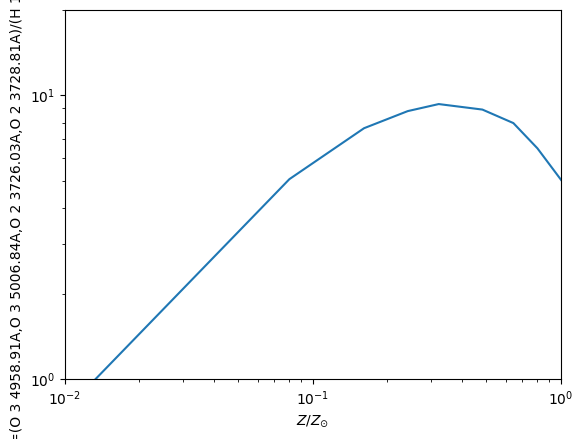

In [27]:
ratio_id = 'R23'
ia = 0  # 1 Myr old for test grid
ratios = []
for iZ, Z in enumerate(grid.metallicity):
    grid_point = (ia, iZ)
    lines = grid.get_lines_info(grid.line_list, grid_point)
    ratios.append(lines.get_ratio(ratio_id))

Zsun = grid.metallicity/0.0124
plt.plot(Zsun, ratios)
plt.xlim([0.01, 1])
plt.ylim([1, 20])
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$Z/Z_{\odot}$')
plt.ylabel(lines.get_ratio_label(ratio_id))
plt.show()

We can also generate "diagrams" pairs of line ratios like the BPT diagram

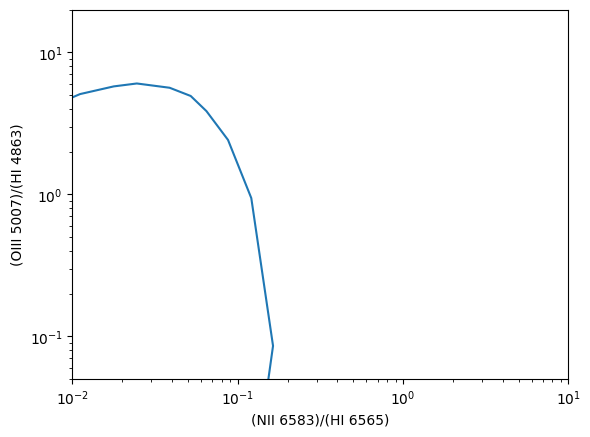

In [28]:
diagram_id = 'BPT-NII'
ia = 0  # 1 Myr old for test grid
x = []
y = []
for iZ, Z in enumerate(grid.metallicity):
    grid_point = (ia, iZ)
    lines = grid.get_lines_info(grid.line_list, grid_point)
    x_, y_ = lines.get_diagram(diagram_id)
    x.append(x_)
    y.append(y_)

plt.plot(x, y)
plt.xlim([0.01, 10])
plt.ylim([0.05, 20])
plt.xscale('log')
plt.yscale('log')

# grab x and y labels, this time use "fancy" label ids
xlabel, ylabel = lines.get_diagram_label(diagram_id, fancy=True)

plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()